# Urban sound
The dataset is called UrbanSound and contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes:
* Air Conditioner
* Car Horn
* Children Playing
* Dog bark
* Drilling
* Engine Idling
* Gun Shot
* Jackhammer
* Siren
* Street Music

## Data sources

To fetch sound files: 
* https://zenodo.org/record/1203745#.XjQJGyMo-qo
* https://drive.google.com/drive/folders/0By0bAi7hOBAFUHVXd1JCN3MwTEU

Articles:
* https://mc.ai/urban-sound-classification-using-convolutional-neural-networks-with-keras-theory-and/
* https://www.kaggle.com/zhoulingyan0228/reading-24-bit-urban-sound-cnn
* https://www.kaggle.com/papeloto/urban-sound-feature-extraction-knn
* https://www.kaggle.com/scollinsarroyo/starter-urban-sound-classification-6383c397-9
* https://www.kaggle.com/mychen76/automatic-urban-sound-classification-with-cnn
* https://medium.com/@mikesmales/sound-classification-using-deep-learning-8bc2aa1990b7
* http://aqibsaeed.github.io/2016-09-03-urban-sound-classification-part-1/
* https://github.com/AmritK10/Urban-Sound-Classification
* https://towardsdatascience.com/urban-sound-classification-part-1-99137c6335f9
* https://github.com/tthustla/urban_sound_classification/blob/master/urban_sound_classification_part1.ipynb
* https://github.com/daisukelab/ml-urban-sound
* https://www.kaggle.com/pavansanagapati/music-classification-using-cnn-model/comments


In [198]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import matplotlib.pyplot as plt

In [207]:
# Downloadable from: https://drive.google.com/drive/folders/0By0bAi7hOBAFUHVXd1JCN3MwTEU
dataset = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
dataset

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


classes: {0: 'air_conditioner', 1: 'car_horn', 2: 'children_playing', 3: 'dog_bark', 4: 'drilling', 5: 'engine_idling', 6: 'gun_shot', 7: 'jackhammer', 8: 'siren', 9: 'street_music'}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF48791940>]],
      dtype=object)

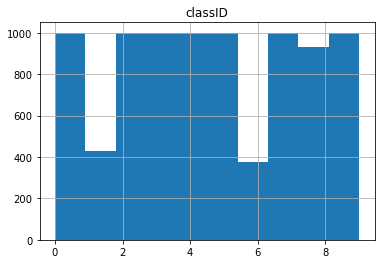

In [200]:
# classID:
classes = { 
    0 : 'air_conditioner',
    1 : 'car_horn',
    2 : 'children_playing',
    3 : 'dog_bark',
    4 : 'drilling',
    5 : 'engine_idling',
    6 : 'gun_shot',
    7 : 'jackhammer',
    8 : 'siren',
    9 : 'street_music'
}

print ('classes:', classes)

# histogram of classes
dataset.hist(column='classID')

** dog_bark **


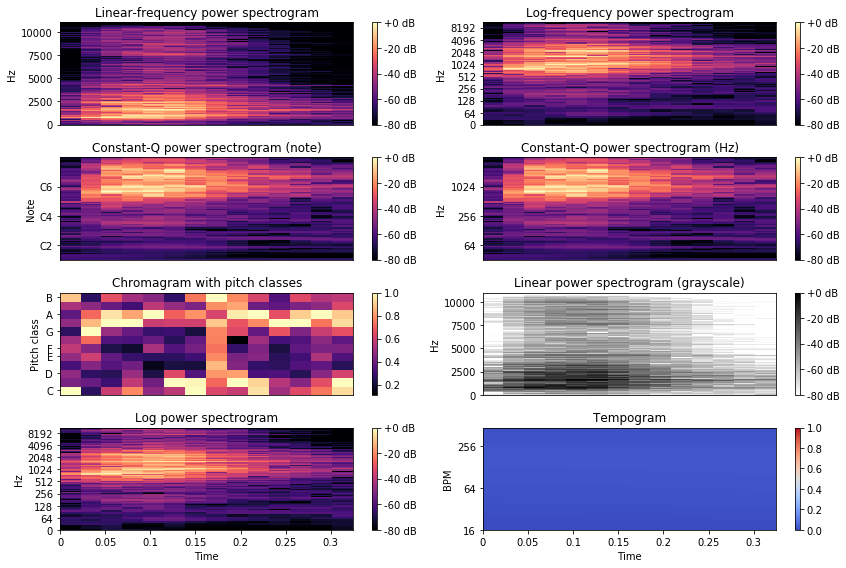

In [201]:
# see: https://librosa.github.io/librosa/generated/librosa.display.specshow.html#librosa.display.specshow
print ('** dog_bark **')
wav_file = 'UrbanSound8K/audio/fold5/100032-3-0-0.wav'

# Visualize an STFT power spectrum
y, sr = librosa.load(wav_file)
plt.figure(figsize=(12, 8))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Or on a logarithmic scale
plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

# Or use a CQT scale
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.subplot(4, 2, 3)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

plt.subplot(4, 2, 4)
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

# Draw a chromagram with pitch classes
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(4, 2, 5)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram with pitch classes')

# Force a grayscale colormap (white -> black)
plt.subplot(4, 2, 6)
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')

# Draw time markers automatically
plt.subplot(4, 2, 7)
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log power spectrogram')

# Draw a tempogram with BPM markers
plt.subplot(4, 2, 8)
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')
plt.tight_layout()
plt.show()


In [202]:
dataset["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [203]:
dataset['class'].value_counts()

jackhammer          1000
drilling            1000
dog_bark            1000
children_playing    1000
engine_idling       1000
street_music        1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [204]:
dataset['class'].value_counts(normalize = True)

jackhammer          0.114521
drilling            0.114521
dog_bark            0.114521
children_playing    0.114521
engine_idling       0.114521
street_music        0.114521
air_conditioner     0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

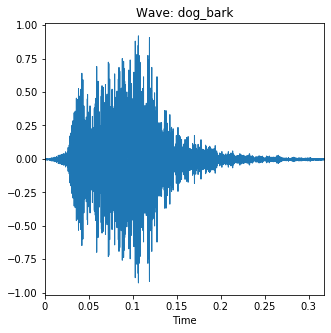

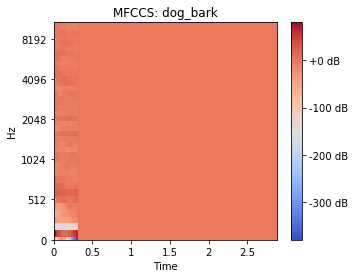

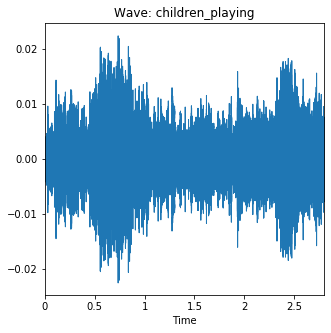

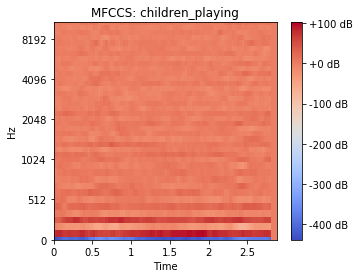

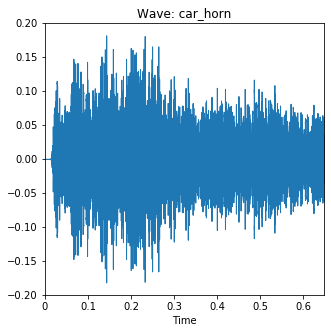

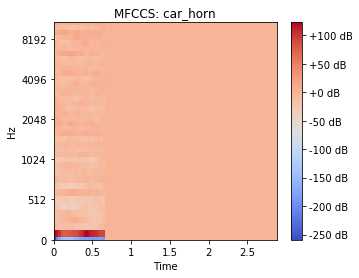

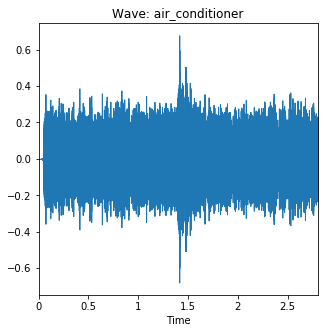

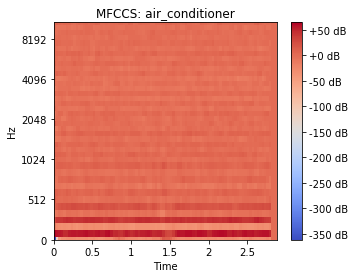

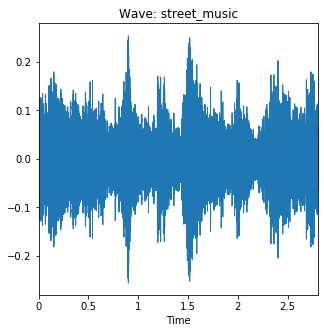

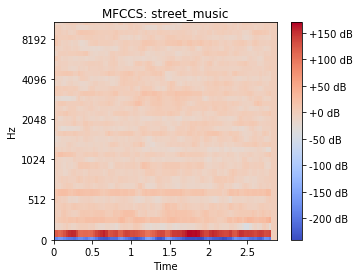

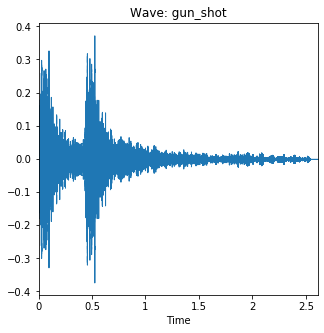

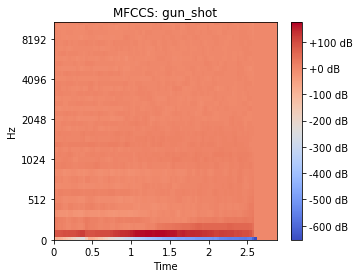

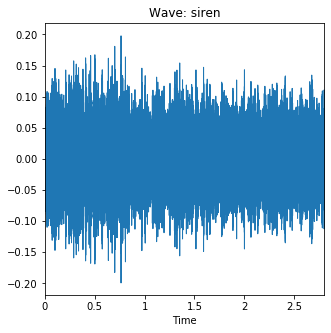

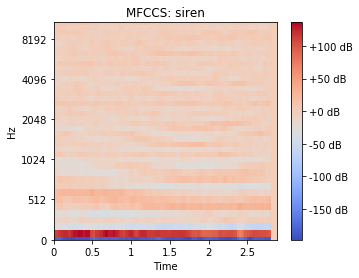

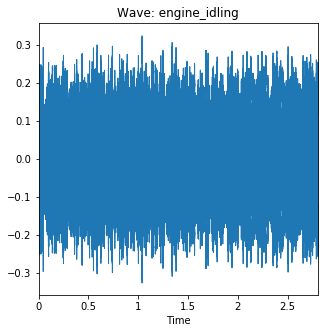

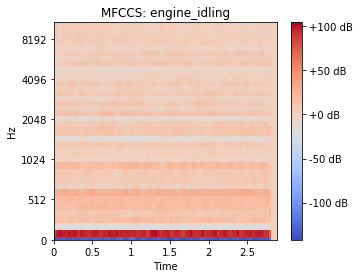

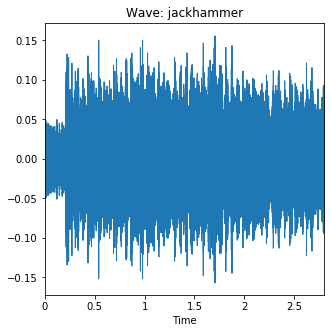

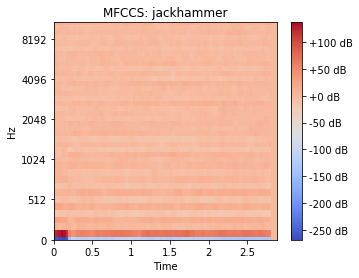

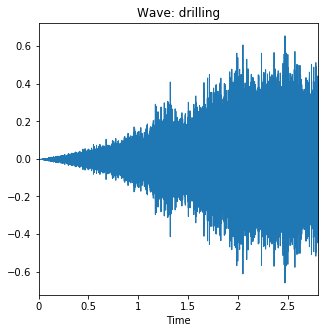

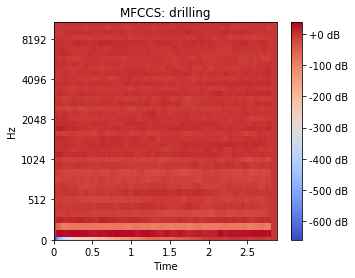

In [307]:
# MFCC uses a quasi-logarithmic spaced frequency scale
# MFCCs are derived as follows (wiki):
# - Take the Fourier transform of (a windowed excerpt of) a signal.
# - Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
# - Take the logs of the powers at each of the mel frequencies.
# - Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
# - The MFCCs are the amplitudes of the resulting spectrum.

SAMPLING_RATE = 16000
MFCC_NUM = 40
MFCC_MAX_LEN = 90
DURATION = 2.8 # seconds

# return sampled WAV data and MFCCs taken from mono channel
# apply MFCCs padding to unified length
def wav2mfcc(wav_file):
    wav_data_orig, _ = librosa.load(wav_file, sr=SAMPLING_RATE, duration=DURATION)
    wav_data = librosa.to_mono(wav_data_orig)
    mfccs = librosa.feature.mfcc(y=wav_data, sr=SAMPLING_RATE, n_mfcc=MFCC_NUM)

    # apply padding
    if (MFCC_MAX_LEN > mfccs.shape[1]):
        pad_width = MFCC_MAX_LEN - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :MFCC_MAX_LEN] # cut off
    
    return wav_data_orig, mfccs

def get_wav_path(row):
    wav_file = os.path.join('UrbanSound8K', 'audio', 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    return wav_file

loaded_sounds = []

# plot samples of all sound types
for index, row in dataset.iterrows():
    if row['class'] in loaded_sounds:
        continue;
        
    loaded_sounds.append(row['class'])

    wav_file = get_wav_path(row)
    wav_data, mfccs = wav2mfcc(wav_file)
    
    plt.figure(figsize=(5,5))
    librosa.display.waveplot(wav_data, sr=sample_rate)
    plt.title('Wave: ' + classes[row["classID"]])
    plt.show()
    
    plt.figure(figsize=(5,4))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCS: ' + classes[row["classID"]])
    plt.show()
    
    if len(loaded_sounds) == 10:
        break

In [305]:
import pickle

extract_features = False
dump_features = False
load_features = False

sounds_mfccs = []
sounds_classes = []

sounds_mfccs_file = os.path.join('results', 'sounds_mfccs_v1.pickle')
sounds_class_file = os.path.join('results', 'sounds_class_v1.pickle')

print('Processing wav files...')

total = len(dataset)
count = 0

if extract_features:
    for index, row in dataset.iterrows():
        # print('Processing:', wav_file)
        wav_file = get_wav_path(row)    
        _, mfccs = wav2mfcc(wav_file)

        sounds_classes.append(row['classID'])
        sounds_mfccs.append(mfccs)

        count += 1
        if (count % 100 == 0):
            print('Processed:', str(int(count / total * 100.0)), '%')
            
    print('Features extracted:', len(sounds_classes))

    if dump_features:
        # store
        with open(sounds_mfccs_file, 'wb') as f:
            pickle.dump(sounds_mfccs, f, protocol=pickle.HIGHEST_PROTOCOL)
        with open(sounds_class_file, 'wb') as f:
            pickle.dump(sounds_classes, f, protocol=pickle.HIGHEST_PROTOCOL)
        print('Data stored:', len(sounds_classes))        
   
if load_features:
    with open(sounds_mfccs_file, 'rb') as f:
        sounds_mfccs = pickle.load(f)
    with open(sounds_class_file, 'rb') as f:
        sounds_classes = pickle.load(f)
    print('Data loaded:', len(sounds_classes))


Processing wav files...


In [168]:
# Keras (from TensorFlow) imports for the dataset and building NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [289]:
y_test = to_categorical(sounds_classes)
x_test = np.array(sounds_mfccs)

num_rows = MFCC_MAX_LEN
num_columns = MFCC_NUM
num_channels = 1
num_classes = len(classes)

input_shape=(num_columns, num_rows, num_channels)

# split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(x_test, y_test, test_size=0.1, random_state=42)

# reshape train/test input vectors
X_train = X_train.reshape(X_train.shape[0], num_columns, num_rows, num_channels)
X_test = X_test.reshape(X_test.shape[0], num_columns, num_rows, num_channels)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('input_shape:', input_shape)

X_train: (7858, 40, 90, 1)
Y_train: (7858, 10)
input_shape: (40, 90, 1)


In [262]:
# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_classes, activation='softmax'))

In [263]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 39, 89, 16)        80        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 19, 44, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 19, 44, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 18, 43, 32)        2080      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 9, 21, 32)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 9, 21, 32)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 20, 64)        

In [270]:
num_epochs = 50
num_batch_size = 32

history = model.fit(
    X_train,
    Y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, Y_test),
    verbose=1)

Train on 7858 samples, validate on 874 samples
Epoch 1/50
7858/7858 [==============================] - 19s 2ms/sample - loss: 0.1245 - accuracy: 0.9580 - val_loss: 0.3510 - val_accuracy: 0.9039
Epoch 2/50
7858/7858 [==============================] - 19s 2ms/sample - loss: 0.1241 - accuracy: 0.9593 - val_loss: 0.2904 - val_accuracy: 0.9165
Epoch 3/50
7858/7858 [==============================] - 18s 2ms/sample - loss: 0.1134 - accuracy: 0.9609 - val_loss: 0.3466 - val_accuracy: 0.9062
Epoch 4/50
7858/7858 [==============================] - 18s 2ms/sample - loss: 0.1351 - accuracy: 0.9552 - val_loss: 0.3450 - val_accuracy: 0.9062
Epoch 5/50
7858/7858 [==============================] - 20s 3ms/sample - loss: 0.1114 - accuracy: 0.9617 - val_loss: 0.3077 - val_accuracy: 0.9142
Epoch 6/50
7858/7858 [==============================] - 22s 3ms/sample - loss: 0.1178 - accuracy: 0.9616 - val_loss: 0.3227 - val_accuracy: 0.9165
Epoch 7/50
7858/7858 [==============================] - 19s 2ms/sample 

In [302]:
weights_file = os.path.join('results', 'urban_sound_weights_v1.h5')
model.save_weights(weights_file)
#model.load_weights(weights_file)

In [301]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

# see which we predicted correctly and which not
predicted_classes = model.predict_classes(X_test)

correct_indices = []
incorrect_indices = []

for i, y_row in enumerate(Y_test):
    y_idx = np.nonzero(y_row)[0]

    if predicted_classes[i] == y_idx:
        correct_indices.append(y_idx)
    else:
        incorrect_indices.append(y_idx)

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

874/1 - 0s - loss: 0.1980 - accuracy: 0.9153
Test Loss 0.3279061187868533
Test Accuracy 0.9153318
800  classified correctly
74  classified incorrectly
